In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
xx = np.linspace(-3.5,5.5,101)

ppx = scipy.stats.norm.pdf(xx, loc=1.0)
ccx = scipy.stats.norm.cdf(xx, loc=1.0)

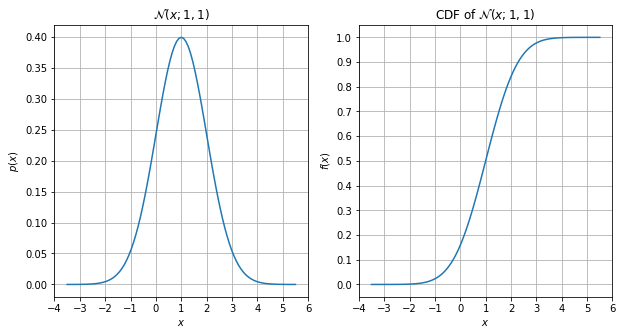

In [3]:
xticks = np.arange(-4, 7, 1.0)
cdf_yticks = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(xx, ppx)
plt.xticks(xticks)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.title(r'$\mathcal{N}(x;1,1)$')
plt.grid()

plt.subplot(122)
plt.plot(xx, ccx)
plt.xticks(xticks)
plt.yticks(cdf_yticks)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'CDF of $\mathcal{N}(x;1,1)$')
plt.grid()

In [4]:
z0 = 0.75
si2 = 0.2
ppzgx = scipy.stats.norm.pdf(z0, loc=xx, scale=si2**0.5)
ppz0 = scipy.stats.norm.pdf(z0, loc=1, scale=(1+si2)**0.5)
ppxgz0 = ppzgx*ppx/ppz0

Estimation of expected value is 0.82 meters.
More precize estimation of expected value is 0.7916666660078922 meters.


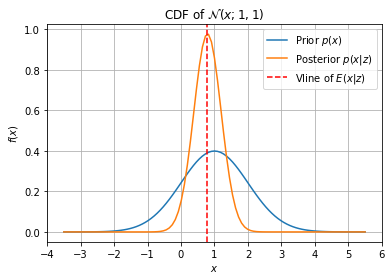

In [5]:
def f(x, z0=0.75, si2=0.2):
    ppx = scipy.stats.norm.pdf(x, loc=1.0)
    ppzgx = scipy.stats.norm.pdf(z0, loc=x, scale=si2**0.5)
    ppz0 = scipy.stats.norm.pdf(z0, loc=1, scale=(1+si2)**0.5)
    ppxgz0 = ppzgx*ppx/ppz0
    return -ppxgz0

xmax = xx[np.argmax(ppxgz0)]
xmax_pres = scipy.optimize.minimize_scalar(f).x


plt.plot(xx,ppx, label=r'Prior $p(x)$')
plt.plot(xx,ppxgz0, label=r'Posterior $p(x|z)$')
plt.axvline(xmax_pres, color='r', linestyle='--', label=r'Vline of $E(x|z)$')

plt.xticks(xticks)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'CDF of $\mathcal{N}(x;1,1)$')
plt.legend()
plt.grid()
#plt.axvline(xmax, color='r')

print('Estimation of expected value is {} meters.'.format(np.round(xmax,3)))
print('More precize estimation of expected value is {} meters.'.format(xmax_pres))

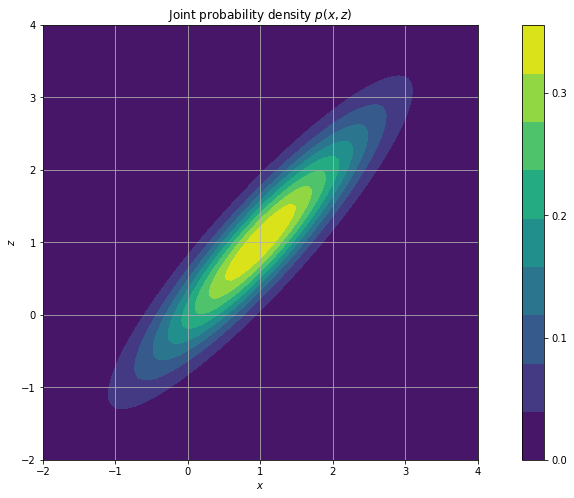

In [6]:
xmin, xmax = -2, 4
zmin, zmax = -2, 4
xxx = np.linspace(xmin, xmax ,101)
zzz = np.linspace(zmin, zmax ,101)

ppx = scipy.stats.norm.pdf(xxx, loc=1.0)
ppzgx = scipy.stats.norm.pdf(zzz.reshape(-1,1), loc=xxx.reshape(1,-1), scale=si2**0.5)
ppxz = ppzgx*ppx

xticks = np.arange(xmin, xmax+0.1, 1.0)
yticks = np.arange(zmin, zmax+0.1, 1.0)
levels = np.linspace(0, np.max(ppxz), 10)
ticks = np.linspace(0, np.ceil(np.max(ppxz)*10)/10, 5)

fig, ax = plt.subplots(figsize=(16,8))
cntr = ax.contourf(xxx,zzz, ppxz, levels=levels)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$z$')
ax.set_title(r'Joint probability density $p(x,z)$')
ax.grid()
#plt.axis('equal')
ax.set_aspect('equal')
plt.colorbar(cntr, ticks=ticks)

## Task 2

#### A

In [306]:
def plot2dcov(m, S, k=1.0, nofp=30, 
              new_fig=False, figsize=(5,5), 
              color=None, style='-', label=None):
    if new_fig == True:
        plt.figure(figsize=figsize)
    L = scipy.linalg.cholesky(S, lower=True)
    angles = np.linspace(0.0, 2*np.pi, nofp)
    coords = np.array([np.cos(angles), np.sin(angles)])
    coords = coords
    res = L@coords*k + m
    plt.axis('equal')
    plt.plot(res[0], res[1], style, color=color, label=label)
    return res, L
    

array([[1.41421356, 0.        ],
       [0.70710678, 1.22474487]])

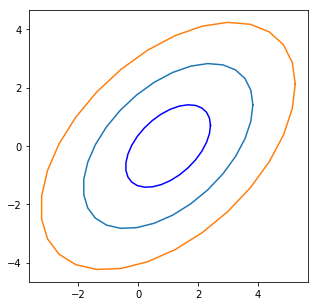

In [228]:
S = np.array([[2, 1],
              [1, 2]])


plot2dcov(m=np.array([[1],[0]]), S=S, k=1, new_fig=True, color='b')
plot2dcov(m=np.array([[1],[0]]), S=S, k=2)
res, L = plot2dcov(m=np.array([[1],[0]]), S=S, k=3)
L

In [229]:
dists = ((np.array([[0], [0]]), np.array([[1, 0], [0, 2]])), 
      (np.array([[5], [0]]), np.array([[3, -0.4], [-0.4, 2]])), 
      (np.array([[2], [2]]), np.array([[9.1, 6], [6, 4]])))

In [230]:
n = ns[0]
print(n[0])
print(n[1])

[[0]
 [0]]
[[1 0]
 [0 2]]


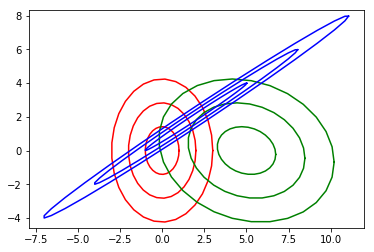

In [231]:
colors = 'r', 'g', 'b' 
for dist, color in zip(dists, colors):
    for k in range(1,4):
        plot2dcov(m=dist[0], S=dist[1], k=k, color=color)
        plt.axis('equal')

#### B
On tex

#### C

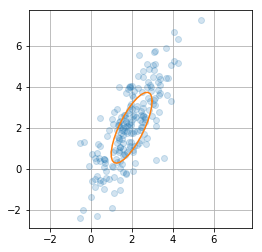

In [252]:
# Given parameters of distribution
dist = (np.array([[2], [2]]), np.array([[1, 1.3], [1.3, 3]]))
# Draw samples from N(0, I) using Cholesky
smpls_num = 200
L = scipy.linalg.cholesky(dist[1], lower=True)
smpls = L@np.random.randn(2, smpls_num) + dist[0]

plt.figure(figsize=(4,4))
plt.plot(smpls[0],smpls[1], 'o', alpha=0.2)
plot2dcov(dist[0], dist[1], k=1)
plt.axis('equal')
plt.grid()

In [257]:
N = smpls.shape[1]
smean = 1.0 / N * np.sum(smpls, axis=1)
smean = smean.reshape(smpls.shape[0],-1)
scov = 1.0 / (N - 1) * (smpls-smean)@(smpls-smean).T
sdist = (smean, scov)

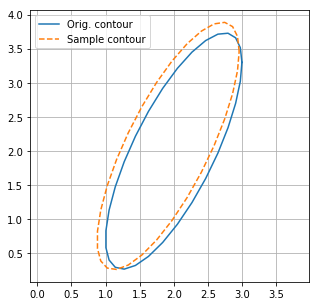

In [258]:
plot2dcov(dist[0], dist[1], k=1, new_fig=True, figsize=(5,5), 
          label='Orig. contour')
plot2dcov(sdist[0], sdist[1], k=1, style='--', label='Sample contour')
plt.axis('equal')
plt.legend()
plt.grid()

## Task 3

#### A

$$
x_t = Ax_{t-1} + \xi\text{, where}\\
A = \begin{bmatrix}
    1 + \Delta t & 0 \\
    0 & 1\\
\end{bmatrix} \text{, }
\xi = \begin{bmatrix}
2\Delta t\\
0
\end{bmatrix}\text{.}\\
\text{Thus, }\\
\mu_t = A \mu_{t-1} + \xi\\
\Sigma_t = A \Sigma_{t-1} A^\intercal
\\
\\
\begin{align}
\Bigg( \Sigma_t = &\mathop{\mathbb{E}}\left[ (x_t-\mu_t)(x_t-\mu_t)^\intercal\right] = \mathop{\mathbb{E}}\left[ (A(x_t-\mu_t))((x_t-\mu_t)A)^\intercal\right]\\
=& \mathop{\mathbb{E}}\left[ A(x_t-\mu_t)(x_t-\mu_t)A^\intercal\right] = A \mathop{\mathbb{E}}\left[ (x_t-\mu_t)(x_t-\mu_t)\right]A^\intercal\\
=& A\Sigma_{t-1}A^\intercal \Bigg)
\end{align}
$$

In [494]:
dt = 0.5
A = np.array([[1. + dt, 0.], [0., 1.]])
xi = np.array([[2. + dt], [0.]])
mu_0 = np.array([[0], [0]])
S_0 = np.array([[0.1, 0], [0, 0.1]])

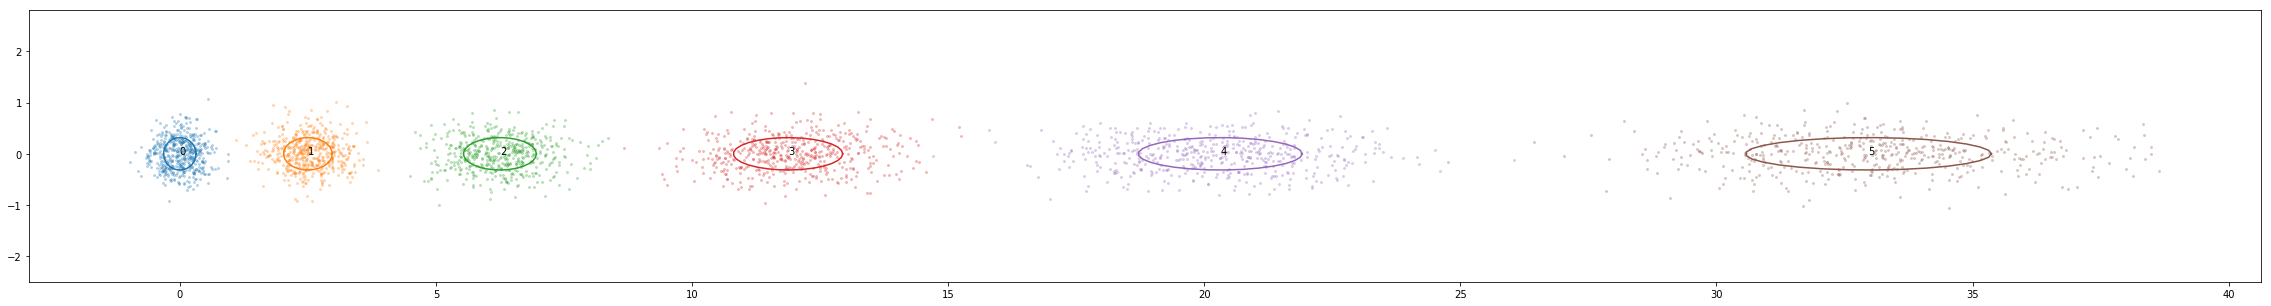

In [495]:
def plot_prop(mu, S, t, smpls_num=500, alpha=0.25, plot_points=False):
    if plot_points == True:
        L = scipy.linalg.cholesky(S, lower=True)
        smpls = L@np.random.randn(2, smpls_num) + mu
        p = plt.plot(smpls[0],smpls[1], 'o', markersize=2, alpha=alpha)
        color = p[0].get_color()
        plot2dcov(mu, S, color=color)
    else:
        plot2dcov(mu, S)
        #text_y_pos = 3.*np.sign((t/dt)%2-0.5)-0.3
    plt.text(mu[0], mu[1], '{}'.format(t))
    return 0
    
plt.figure(figsize=(40,5))
mu, S =mu_0, S_0
T = 5
for t in np.arange(T + 1):
    if t%1==0:
        plot_prop(mu, S, t, plot_points=True)
    if t == T:
        break
    mu = A@mu + xi
    S = A@S@A.T
    
    

#### B

Rewrite the given equation as:
$$
\begin{aligned}
x_t =& I\,x_{t-1} + \Delta t\,I\,v_t + \eta_t\\
=& x_{t-1} + \Delta t\,v_t + \eta_t\\
\end{aligned}\\
$$
Equations for mean and covariance:
$$
\begin{align}
\mu_t =& \mu_{t-1} + \Delta t\,v_t\\
\Sigma_t =& \Sigma_{t-1} + R \text{, where covariance } R = \mathop{\mathbb{E}}\left[ \eta_t\eta_t^\intercal\right] \text{ is given,}\\
\text{or}\\
\Sigma_t =& \Sigma_{t-1} + R = \Sigma_{t-2} + R + R = \dots =\Sigma_0 + t\,R 
\\
\\
\end{align}
$$
$$
\begin{align}
\big( \Sigma_t = &\mathop{\mathbb{E}}\left[ (x_t-\mu_t)(x_t-\mu_t)^\intercal\right]\\
=& \mathop{\mathbb{E}}\left[ (x_{t-1} + \Delta t\,v_t + \eta_t - \mu_{t-1} - \Delta t\,v_t)(x_{t-1} + \Delta t\,v_t + \eta_t - \mu_{t-1} - \Delta t\,v_t)^\intercal\right]\\
=& \mathop{\mathbb{E}}\left[ (x_{t-1} + \eta_t - \mu_{t-1})(x_{t-1} + \eta_t - \mu_{t-1})^\intercal\right]\\
=& \mathop{\mathbb{E}}\left[ (x_{t-1} - \mu_{t-1})(x_{t-1} - \mu_{t-1})^\intercal + (x_{t-1} - \mu_{t-1})\eta_t^\intercal  + \eta_t(x_{t-1} - \mu_{t-1})^\intercal + \eta_t\eta_t^\intercal\right]\\
=& \mathop{\mathbb{E}}\left[ (x_{t-1} - \mu_{t-1})(x_{t-1} - \mu_{t-1})^\intercal\right]  + \mathop{\mathbb{E}}\left[ \eta_t\eta_t^\intercal\right]\\
=& \Sigma_{t-1} + R\text{.}
\big)
\end{align}
$$


#### C

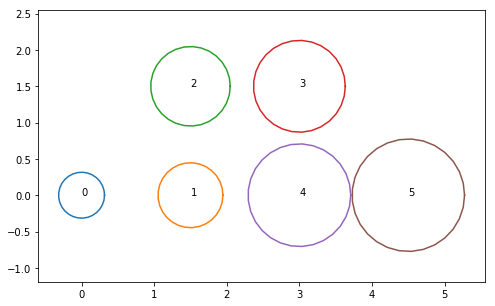

In [461]:
u = np.array([[3, 0], [0, 3], [3, 0], [0, -3], [3, 0]])
mu_0 = np.array([[0], [0]])
S_0 = np.array([[0.1, 0], [0, 0.1]])
R = np.array([[0.1, 0], [0, 0.1]])
dt = 0.5

plt.figure(figsize=(8,5))
mu, S =mu_0, S_0
T = 5
for t in np.arange(T + 1):
    
    plot_prop(mu, S, t)
    if t == T:
        break
    mu = mu + dt*u[t].reshape(2,-1)
    S = S + R

#### D

$$
x_t = x_{t-1} + B_t\,u_t + \eta_t \text{, where}\\
B_t = \begin{bmatrix}
\cos(\theta_{t-1})\Delta t & 0\\
\sin(\theta_{t-1})\Delta t & 0\\
0 & \Delta t\\
\end{bmatrix}\text{, }
u_t =
\begin{bmatrix}
v\\
\omega\\
\end{bmatrix}_t\text{.}\\
\\
\mu_t = \mu_{t-1} + \mathbb{E}[B_t] u_t
$$

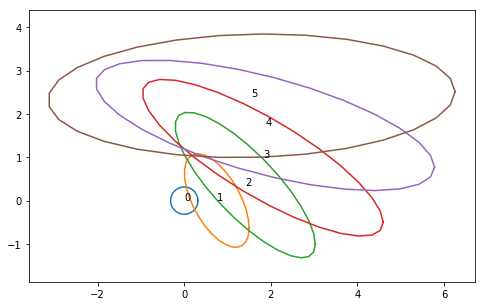

In [492]:
u = np.array([[3], [2]])
mu_0 = np.array([[0], [0], [0]])
S_0 = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])
R = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])

def compB(teta, dt=0.5):
    B = np.array([[np.cos(teta).squeeze()*dt, 0],
                  [np.sin(teta).squeeze()*dt, 0],
                  [0, dt]])
    return B
def compC(teta, v, dt=0.5):
    C = np.array([[1, 0, -np.sin(teta)*dt*v],
                  [0, 1, np.cos(teta)*dt*v],
                  [0, 0, 1]])
    return C


plt.figure(figsize=(8,5))
mu, S =mu_0, S_0
T = 5
for t in np.arange(T + 1):
    plot_prop(mu[:2], S[:2, :2], t)
    #plt.plot(mu[0], mu[1], 'o')
    if t == T:
        break
    B = compB(mu[2])
    mu = mu + dt*B@u
    C = compC(mu[2], u[0])
    S = C@S@C.T + R

## Task 4

#### A

$$
x_t = x_{t-1} + \Delta t\,(u_t+ \epsilon_t) \text{, } \epsilon \sim \mathcal{N}(0,M)\text{, } M = 4
$$

In [302]:
arch = np.load('t4')

In [303]:
oks = ['not ok', 'ok', 'ok', 'not ok', 'ok', 'ok', 'ok', 'ok', 'not ok', 'ok']
for file, ok in zip(arch.files, oks):
    print(file, arch[file].shape, ok, sep='\t')

P_0	()	not ok
x_0	()	ok
u	(1000,)	ok
Q	()	not ok
z	(1000,)	ok
x_real	(1001,)	ok
t	(1001,)	ok
dt	()	ok
R_action	()	not ok
N	()	ok


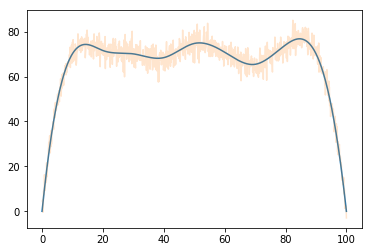

In [301]:
plt.plot(arch['t'], arch['x_real'])
plt.plot(arch['t'][1:], arch['z'], alpha=0.2)

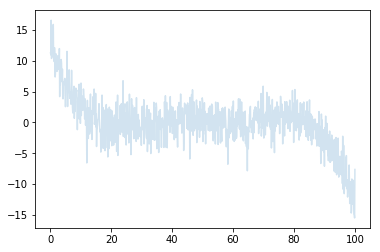

In [291]:
plt.plot(arch['t'][1:], arch['u'], alpha=0.2)